## Algerian Forest Fires Dataset
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012. The dataset includes 11 attribues and 1 output attribue (class) The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations

Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

RH : Relative Humidity in %: 21 to 90

Ws :Wind speed in km/h: 6 to 29

Rain: total day in mm: 0 to 16.8 FWI Components

Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

Drought Code (DC) index from the FWI system: 7 to 220.4

Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

Buildup Index (BUI) index from the FWI system: 1.1 to 68

Fire Weather Index (FWI) Index: 0 to 31.1

Classes: two classes, namely Fire and not Fire

In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df = pd.read_csv("Algerian_forest_fires_dataset.csv", header=1)
df.head()

In [ ]:
df.info()

In [ ]:
df[df.isnull().any(axis=1)]

In [ ]:
df.loc[:122,"Region"] = 0
df.loc[122:,"Region"] = 1

In [ ]:
df[['Region']] = df[['Region']].astype(int)
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df = df.dropna().reset_index(drop=True)

In [ ]:
df.isna().sum()

In [ ]:
df.isnull().sum()

In [ ]:
df.iloc[[122]]

In [ ]:
df = df.drop(122).reset_index(drop=True)

In [ ]:
df.iloc[[122]]

In [ ]:
df.columns

In [ ]:
df.columns = df.columns.str.strip()
df.columns

In [ ]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [ ]:
df.info()

In [ ]:
df[['Rain']] = df[['Rain']].astype('object')

In [ ]:
df.info()

In [ ]:
objects = [features for features in df.columns if df[features].dtype == 'O']

In [ ]:
for i in objects:
    if i != "Classes":
        df[i] = df[i].astype(float)

In [ ]:
df.info()

In [ ]:
df.to_csv("Algerian_forest_fires_dataset_cleaned.csv", index=False)

In [ ]:
df_copy = df.drop(columns=['day', 'month', 'year'])

In [ ]:
df_copy.head()

In [ ]:
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'), 0, 1)
df_copy.head()

In [ ]:
df_copy['Classes'].value_counts()

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
percentage=df_copy['Classes'].value_counts(normalize=True)*100

In [ ]:
classlabels=["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

In [ ]:
df_copy.corr()

In [ ]:
sns.heatmap(df_copy.corr())

In [ ]:
sns.boxplot(df['FWI'],color='green')

In [ ]:
df.head()

In [ ]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

In [ ]:
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

In [ ]:
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brjaia Regions",weight='bold')

In [ ]:
df.columns

In [ ]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [ ]:
df.head()

In [ ]:
df['Classes'].value_counts()

In [ ]:
df.head()

In [ ]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [ ]:
df['Classes'].value_counts()

In [ ]:
X = df.drop('FWI', axis=1)
y = df['FWI']

In [ ]:
X

In [ ]:
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
X_train.corr()

In [ ]:
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features=correlation(X_train,0.85)

In [ ]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train_scaled

In [ ]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

In [150]:
regression = LinearRegression(n_jobs=-1)
regression.fit(X_train_scaled, y_train)

print("Coefficient or slope:", regression.coef_)
print("Intercept:", regression.intercept_)

Coefficient or slope: [-0.03634495 -0.17441065  0.00703214 -0.04108155 -0.82319823  3.6982583
  4.84057298  0.40422124 -0.39259928]
Intercept: 7.156043956043957


In [151]:
validation_score = cross_val_score(regression,X_train_scaled,y_train,scoring='neg_mean_squared_error',
                                cv=3)
np.mean(validation_score)

-2.7933240294438444

In [152]:
y_pred = regression.predict(X_test_scaled)

In [144]:
residuals=y_test-y_pred
print(residuals)

24     0.176595
6     -0.552529
152    0.754117
232   -0.555893
238   -0.191359
         ...   
162    0.157949
178   -0.017026
224    0.272668
230    0.782918
154    0.019510
Name: FWI, Length: 61, dtype: float64


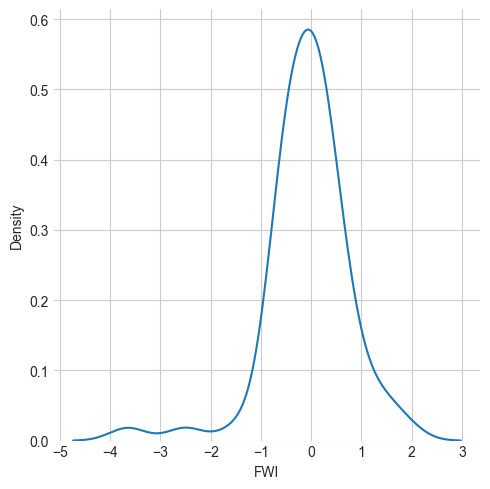

In [153]:
sns.displot(residuals,kind='kde')

In [146]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error: 0.6742766873791568
Mean Absolute Error: 0.5468236465249977
Root Mean Squared Error: 0.8211435242265245


In [147]:
r2 = r2_score(y_test, y_pred)
n = len(y_train)
p = X_train.shape[1]
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print("R2 Score:", r2)
print("Adjusted R2 Score:", adjusted_r2)

R2 Score: 0.9847657384266952
Adjusted R2 Score: 0.9839685968327433


In [148]:
model=sm.OLS(y_train,X_train).fit()
prediction=model.predict(X_test)
print(prediction)

24      8.158910
6       7.643018
152    -0.372835
232     4.411719
238     6.613129
         ...    
162     0.757946
178     9.043053
224     3.669910
230    14.440118
154     5.234941
Length: 61, dtype: float64


In [149]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    FWI   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              1165.
Date:                Sat, 16 Nov 2024   Prob (F-statistic):                   8.67e-150
Time:                        17:15:28   Log-Likelihood:                         -310.97
No. Observations:                 182   AIC:                                      639.9
Df Residuals:                     173   BIC:                                      668.8
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Temperature     0.0259      0.033      0.774      0.440      -0.040       0.092
RH             -0.0010      0.009     -0.108      0.914      -0.019       0.017
Ws              0.0251      0.041      0.610      0.543      -0.056       0.106
Rain           -0.0026      0.059     -0.044      0.965      -0.118       0.113
FFMC           -0.0478      0.014     -3.312      0.001      -0.076      -0.019
DMC             0.2896      0.011     25.278      0.000       0.267       0.312
ISI             1.1279      0.051     21.903      0.000       1.026       1.230
Classes         0.6429      0.360      1.788      0.076      -0.067       1.353
Region         -0.7237      0.220     -3.290      0.001      -1.158      -0.290
==============================================================================
Omnibus:                      219.399   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14214.075
Skew:                          -4.604   Prob(JB):                         0.00
Kurtosis:                      45.304   Cond. No.                         382.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Lasso Regression